# **A. INTRODUCTION**

# **B. IMPORT LIBRARY**

# **C. DATA LOADING**

## 1. Memanggil Dataset

In [ ]:
# Import library untuk mengabaikan peringatan
import warnings
warnings.filterwarnings("ignore")

# Import library dataframe & visualisasi
import numpy as np
from numpy import mean
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder, StandardScaler, MinMaxScaler
from sklearn import preprocessing
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.svm import SVC
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import explained_variance_score
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/gdrive/MyDrive/weatherAUS.csv')
pd.set_option('display.max.columns',None)

#Melihat Data Awal
df.head()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
0,2008-12-01,Albury,13.4,22.9,0.6,NaN,NaN,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,8.0,NaN,16.9,21.8,No,No
1,2008-12-02,Albury,7.4,25.1,0.0,NaN,NaN,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,NaN,NaN,17.2,24.3,No,No
2,2008-12-03,Albury,12.9,25.7,0.0,NaN,NaN,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,NaN,2.0,21.0,23.2,No,No
3,2008-12-04,Albury,9.2,28.0,0.0,NaN,NaN,NE,24.0,SE,E,11.0,9.0,45.0,16.0,1017.6,1012.8,NaN,NaN,18.1,26.5,No,No
4,2008-12-05,Albury,17.5,32.3,1.0,NaN,NaN,W,41.0,ENE,NW,7.0,20.0,82.0,33.0,1010.8,1006.0,7.0,8.0,17.8,29.7,No,No


Attribute Information:
- `Date` : tanggal hari itu
- `Location` : kota di Australia
- `MinTemp` : temperatur terendah
- `MaxTemp` : temperatur tertinggi
- `Rainfall` : jumlah curah hujan hari itu
- `Evaporatio`n : jumlah evaporasi dalam mm dari Class A pan selama 24 jam sebelum jam 9 pagi hari itu
- `Sunshine` : jumlah jam hari itu cerah dengan cahaya matahari
- `WindGustDir` : arah kecepatan angin yang paling tinggi selama 24 jam
- `WindGustSpeed` : kecepatan angin yang paling tinggi dalam km/jam selama 24 jam
- `WindDir9am` : arah angin jam 9 pagi
- `WindDir3pm` : arah angin jam 3 sore
- `WindSpeed9am` : kecepatan angin jam 9 pagi dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- `WindSpeed3pm` : kecepatan angin jam 3 sore dalam km/jam dihitung dari rata-rata kecepatan angin 10 menit sebelum jam 3 sore
- `Humidity9am` : humiditas jam 9 pagi dalam persen
- `Humidity3pm` : humiditas jam 3 sore dalam persen
- `Pressure9am` : tekanan udara jam 9 pagi dalam hpa
- `Pressure3pm` : tekanan udara jam 3 sore dalam hpa
- `Cloud9am` : persentase langit yang tertutup awan jam 9 pagi. dihitung dalam oktas, unit ⅛, menghitung berapa unit ⅛ dari langit yang tertutup awan. Jika 0, langit cerah, jika 8, langit sepenuhnya tertutup awan.
- `Cloud3pm` : persentase langit yang tertutup awan jam 3 sore
- `Temp9am `: temperatur jam 9 pagi dalam celcius
- `Temp3pm `: temperatur jam 3 sore dalam celcius
- `RainToday` : apakah hari ini hujan : jika curah hujan 24 jam sebelum jam 9 pagi melebihi 1mm, maka nilai ini adalah 1, jika tidak nilai nya 0
- `RainTomorrow` : variable yang mau di prediksi

## 2. Melihat Jumlah Baris dan Kolom

In [ ]:
df.shape

(145460, 23)

In [ ]:
#Melihat Data terakhir
df.tail()

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
145455,2017-06-21,Uluru,2.8,23.4,0.0,NaN,NaN,E,31.0,SE,ENE,13.0,11.0,51.0,24.0,1024.6,1020.3,NaN,NaN,10.1,22.4,No,No
145456,2017-06-22,Uluru,3.6,25.3,0.0,NaN,NaN,NNW,22.0,SE,N,13.0,9.0,56.0,21.0,1023.5,1019.1,NaN,NaN,10.9,24.5,No,No
145457,2017-06-23,Uluru,5.4,26.9,0.0,NaN,NaN,N,37.0,SE,WNW,9.0,9.0,53.0,24.0,1021.0,1016.8,NaN,NaN,12.5,26.1,No,No
145458,2017-06-24,Uluru,7.8,27.0,0.0,NaN,NaN,SE,28.0,SSE,N,13.0,7.0,51.0,24.0,1019.4,1016.5,3.0,2.0,15.1,26.0,No,No
145459,2017-06-25,Uluru,14.9,NaN,0.0,NaN,NaN,NaN,NaN,ESE,ESE,17.0,17.0,62.0,36.0,1020.2,1017.9,8.0,8.0,15.0,20.9,No,NaN


Data ini memiliki 23 kolom dan 145460 baris

## 3. Melihat Informasi Data

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 23 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   Date           145460 non-null  object 
 1   Location       145460 non-null  object 
 2   MinTemp        143975 non-null  float64
 3   MaxTemp        144199 non-null  float64
 4   Rainfall       142199 non-null  float64
 5   Evaporation    82670 non-null   float64
 6   Sunshine       75625 non-null   float64
 7   WindGustDir    135134 non-null  object 
 8   WindGustSpeed  135197 non-null  float64
 9   WindDir9am     134894 non-null  object 
 10  WindDir3pm     141232 non-null  object 
 11  WindSpeed9am   143693 non-null  float64
 12  WindSpeed3pm   142398 non-null  float64
 13  Humidity9am    142806 non-null  float64
 14  Humidity3pm    140953 non-null  float64
 15  Pressure9am    130395 non-null  float64
 16  Pressure3pm    130432 non-null  float64
 17  Cloud9am       89572 non-null

Dataset memiliki tipe data yang bervariasi yakni float, integer (numerik) dan object (kategorik). Dari informasi data diatas dapat kita lihat itu terdapat missing value karena banyaknya nilai non-null pada beberapa atribut tidak sesuai dengan banyaknya data entri.

# 4. Melihat Kolom Bertipe Data Numerical dan Categorical

In [ ]:
# Melihat kolom berdasarkan tipe data categori
categorical = [i for i in df.columns if df[i].dtypes == 'O']

# Variabel bertipe numerik
numerical = [i for i in df.columns if i not in categorical]

#Melihat colom
print('categorical :', categorical)
print('numerical : ', numerical )

categorical : ['Date', 'Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
numerical :  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm']



## 5. Melihat Jumlah Unique Values pada Setiap Atribut

In [ ]:
df.nunique()

Date             3436
Location           49
MinTemp           389
MaxTemp           505
Rainfall          681
Evaporation       358
Sunshine          145
WindGustDir        16
WindGustSpeed      67
WindDir9am         16
WindDir3pm         16
WindSpeed9am       43
WindSpeed3pm       44
Humidity9am       101
Humidity3pm       101
Pressure9am       546
Pressure3pm       549
Cloud9am           10
Cloud3pm           10
Temp9am           441
Temp3pm           502
RainToday           2
RainTomorrow        2
dtype: int64

# **D. DATA CLEANING**

## 1. Pengecekan Missing value

In [ ]:
#Mengecek apakah terdapat missing value
df.isnull().values.any()

True

In [ ]:
# Memeriksa kolom yang terdapat missing value dan jumlahnya
df.isnull().sum()

Date                 0
Location             0
MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustDir      10326
WindGustSpeed    10263
WindDir9am       10566
WindDir3pm        4228
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
RainToday         3261
RainTomorrow      3267
dtype: int64

Terlihat bahwa terdapat 21 atribut yang mempunyai missing value. Sehingga perlu dilakukan penanganan pada missing value.

### - Melihat missing value pada atribut bertipe numerik

In [ ]:
df[numerical].isnull().sum()

MinTemp           1485
MaxTemp           1261
Rainfall          3261
Evaporation      62790
Sunshine         69835
WindGustSpeed    10263
WindSpeed9am      1767
WindSpeed3pm      3062
Humidity9am       2654
Humidity3pm       4507
Pressure9am      15065
Pressure3pm      15028
Cloud9am         55888
Cloud3pm         59358
Temp9am           1767
Temp3pm           3609
dtype: int64

In [ ]:
#Melihat presentase missing value pada kolom bertipe numerik
missval_num= df[numerical].apply(lambda x: f'{((x.isnull().sum()/df[numerical].shape[0])*100).round(2)} %')
missval_num

MinTemp           1.02 %
MaxTemp           0.87 %
Rainfall          2.24 %
Evaporation      43.17 %
Sunshine         48.01 %
WindGustSpeed     7.06 %
WindSpeed9am      1.21 %
WindSpeed3pm      2.11 %
Humidity9am       1.82 %
Humidity3pm        3.1 %
Pressure9am      10.36 %
Pressure3pm      10.33 %
Cloud9am         38.42 %
Cloud3pm         40.81 %
Temp9am           1.21 %
Temp3pm           2.48 %
dtype: object

### - Melihat missing value pada atribut bertipe categorical

In [ ]:
df[categorical].isnull().sum()

Date                0
Location            0
WindGustDir     10326
WindDir9am      10566
WindDir3pm       4228
RainToday        3261
RainTomorrow     3267
dtype: int64

In [ ]:
#Melihat presentase missing value pada kolom bertipe categoric
missval_ca= df[categorical].apply(lambda x: f'{((x.isnull().sum()/df[categorical].shape[0])*100).round(2)} %')
missval_ca

Date             0.0 %
Location         0.0 %
WindGustDir      7.1 %
WindDir9am      7.26 %
WindDir3pm      2.91 %
RainToday       2.24 %
RainTomorrow    2.25 %
dtype: object

Untuk mengatas missing value, kita menggunakan nilai median pada atribut bertipe numerical dan modus pada atribur bertipe object

## 2. Melihat Distribusi Data

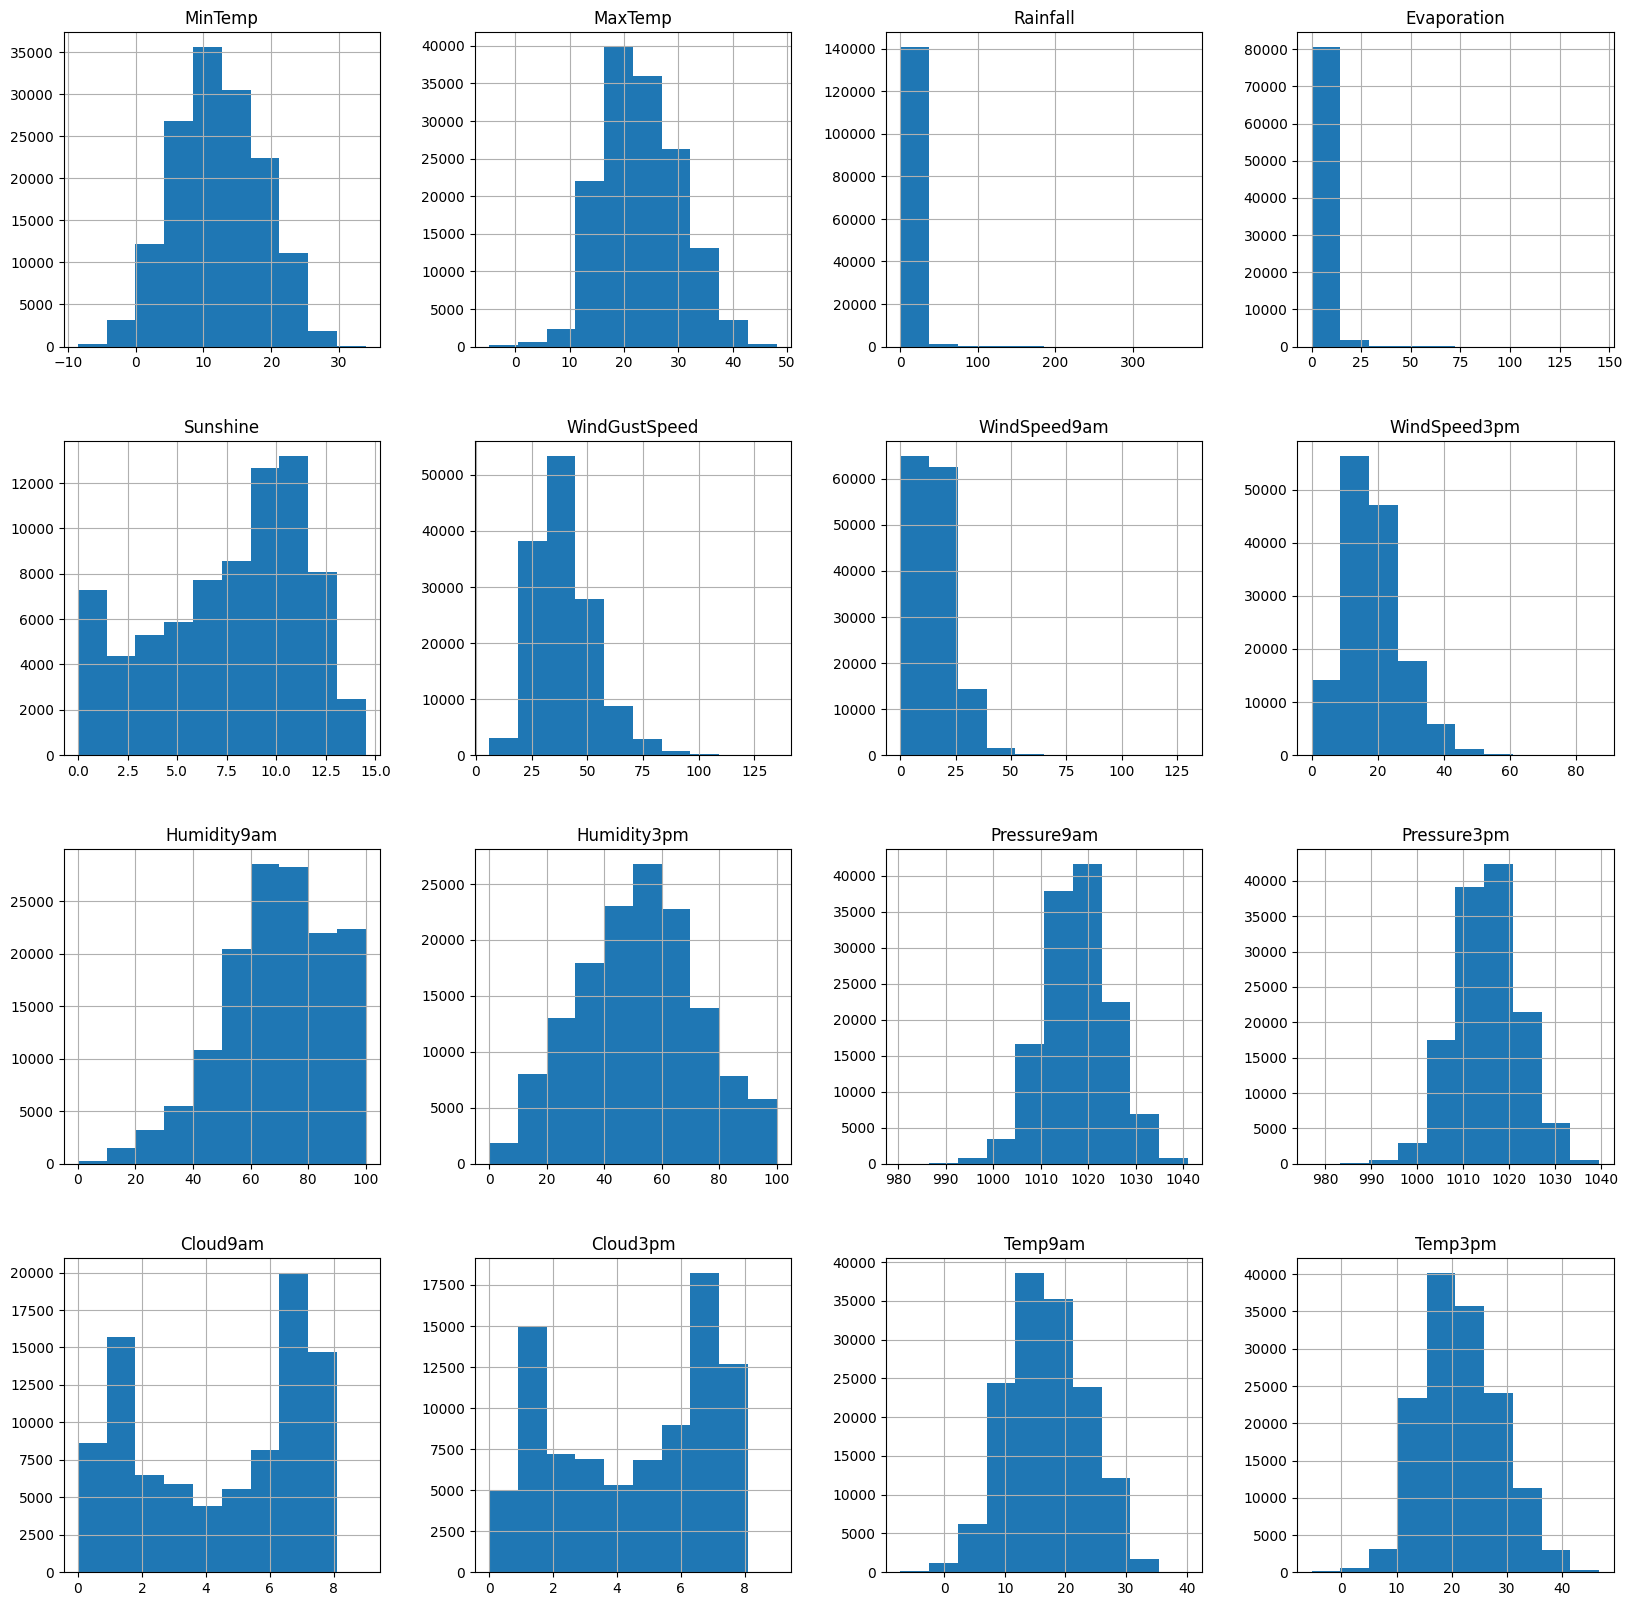

In [ ]:
df[numerical].hist(bins=10, figsize = (20,20))
plt.show()

Dapat dilihat bahwa beberapa atribut memiliki skewness yang tinggi, yaitu pada atribut __Evaporation__ dan **Rainfall**.

## 3. Mengatasi Outlier

### - Mengecek outlie pada kolom beratribut numerical

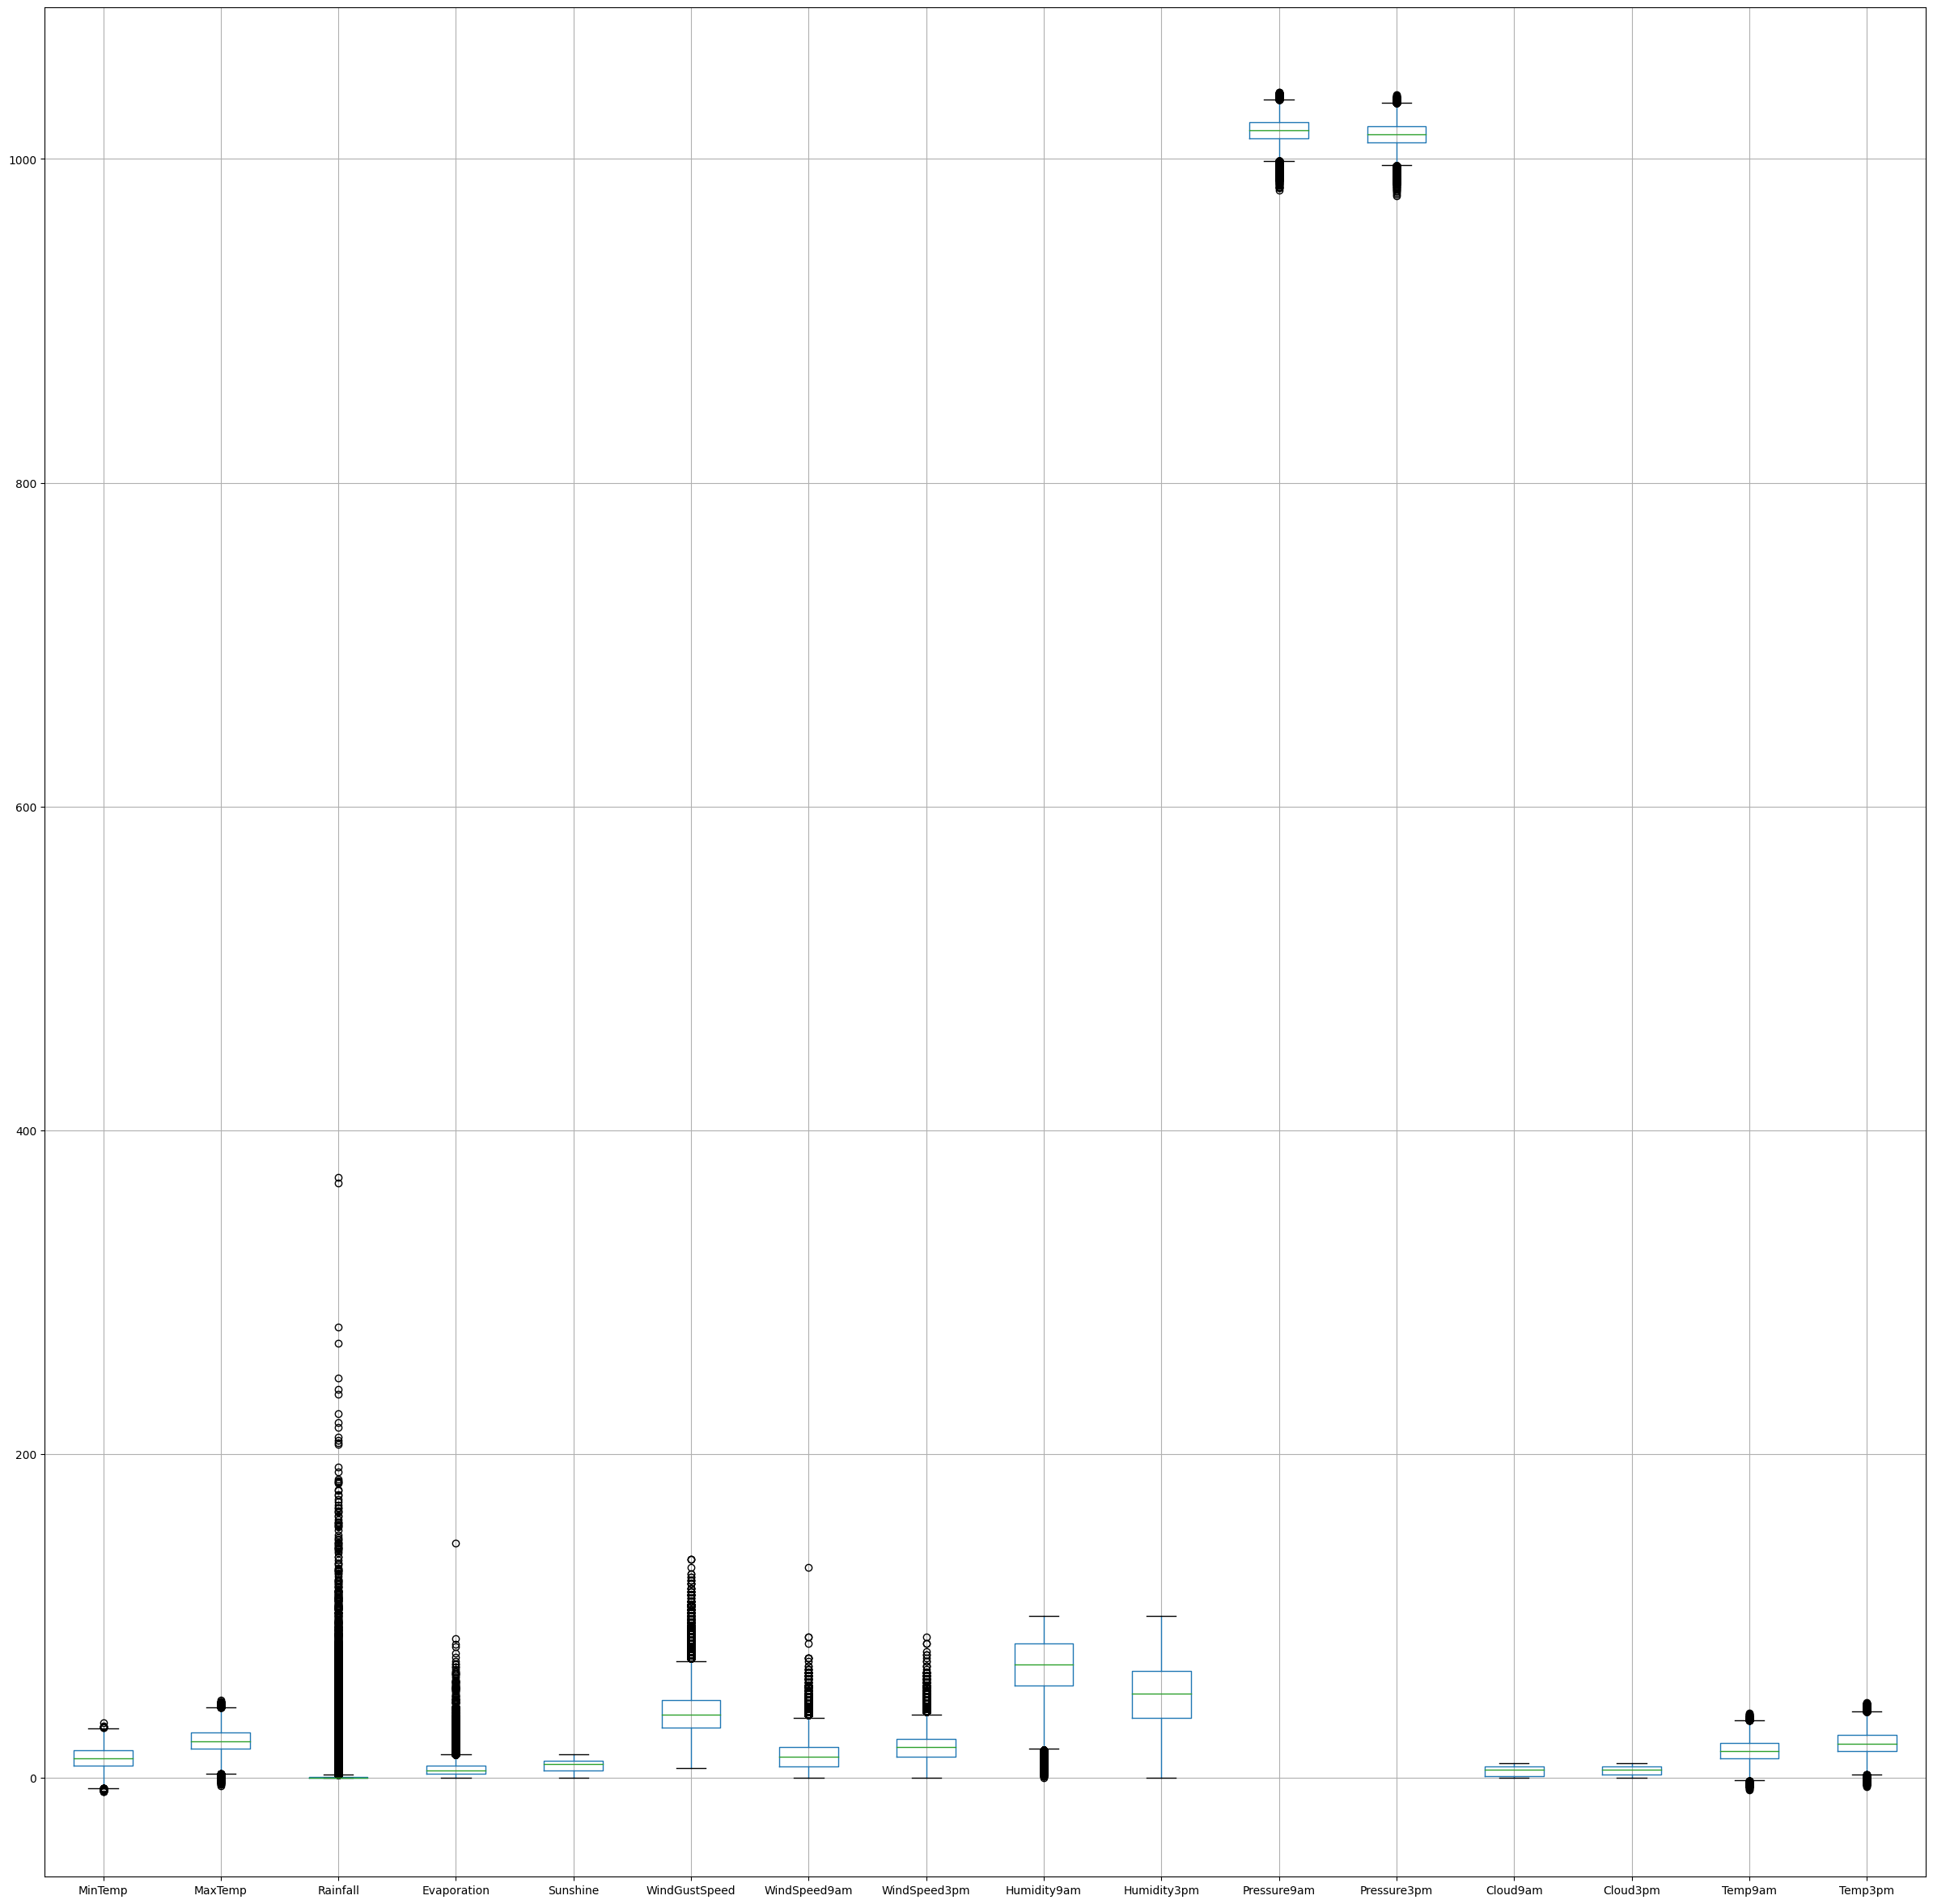

In [ ]:
df[numerical].boxplot(figsize=(30,30))
plt.show()

In [ ]:
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.00000,130432.000000,89572.000000,86102.000000,143693.000000,141851.00000
mean,12.194034,23.221348,2.360918,5.468232,7.611178,40.035230,14.043426,18.662657,68.880831,51.539116,1017.64994,1015.255889,4.447461,4.509930,16.990631,21.68339
std,6.398495,7.119049,8.478060,4.193704,3.785483,13.607062,8.915375,8.809800,19.029164,20.795902,7.10653,7.037414,2.887159,2.720357,6.488753,6.93665
min,-8.500000,-4.800000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,0.000000,0.000000,980.50000,977.100000,0.000000,0.000000,-7.200000,-5.40000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.90000,1010.400000,1.000000,2.000000,12.300000,16.60000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.60000,1015.200000,5.000000,5.000000,16.700000,21.10000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.40000,1020.000000,7.000000,7.000000,21.600000,26.40000
max,33.900000,48.100000,371.000000,145.000000,14.500000,135.000000,130.000000,87.000000,100.000000,100.000000,1041.00000,1039.600000,9.000000,9.000000,40.200000,46.70000


Dari output di atas, dapat kita ketahui bahwa hampir pada seluruh atribut numerical terdapat outlier yaitu pada atribut __MinTemp__, __MaxTemp__, __Rainfall__, __Evaporation__, __WindGustSpeed__, __WindSpeed9am__, __WindSpeed3pm__, __Humidity9am__, __Pressure9am__, __Pressure3pm__, __Temp9am__, dan __Temp3pm__.

### - Mengaatasi Outlier

In [ ]:
outlier_colum = ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm','Temp9am','Temp3pm']

print("Outlier Colum : ", outlier_colum)

Outlier Colum :  ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']


In [ ]:
#Mengatasi outlier dengan IQR
for feature in outlier_colum:
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)

    IQR = Q3-Q1

    lower_limit = Q1 - (IQR*1.5)
    upper_limit = Q3 + (IQR*1.5)
    df.loc[df[feature]<lower_limit,feature] = lower_limit
    df.loc[df[feature]>upper_limit,feature] = upper_limit

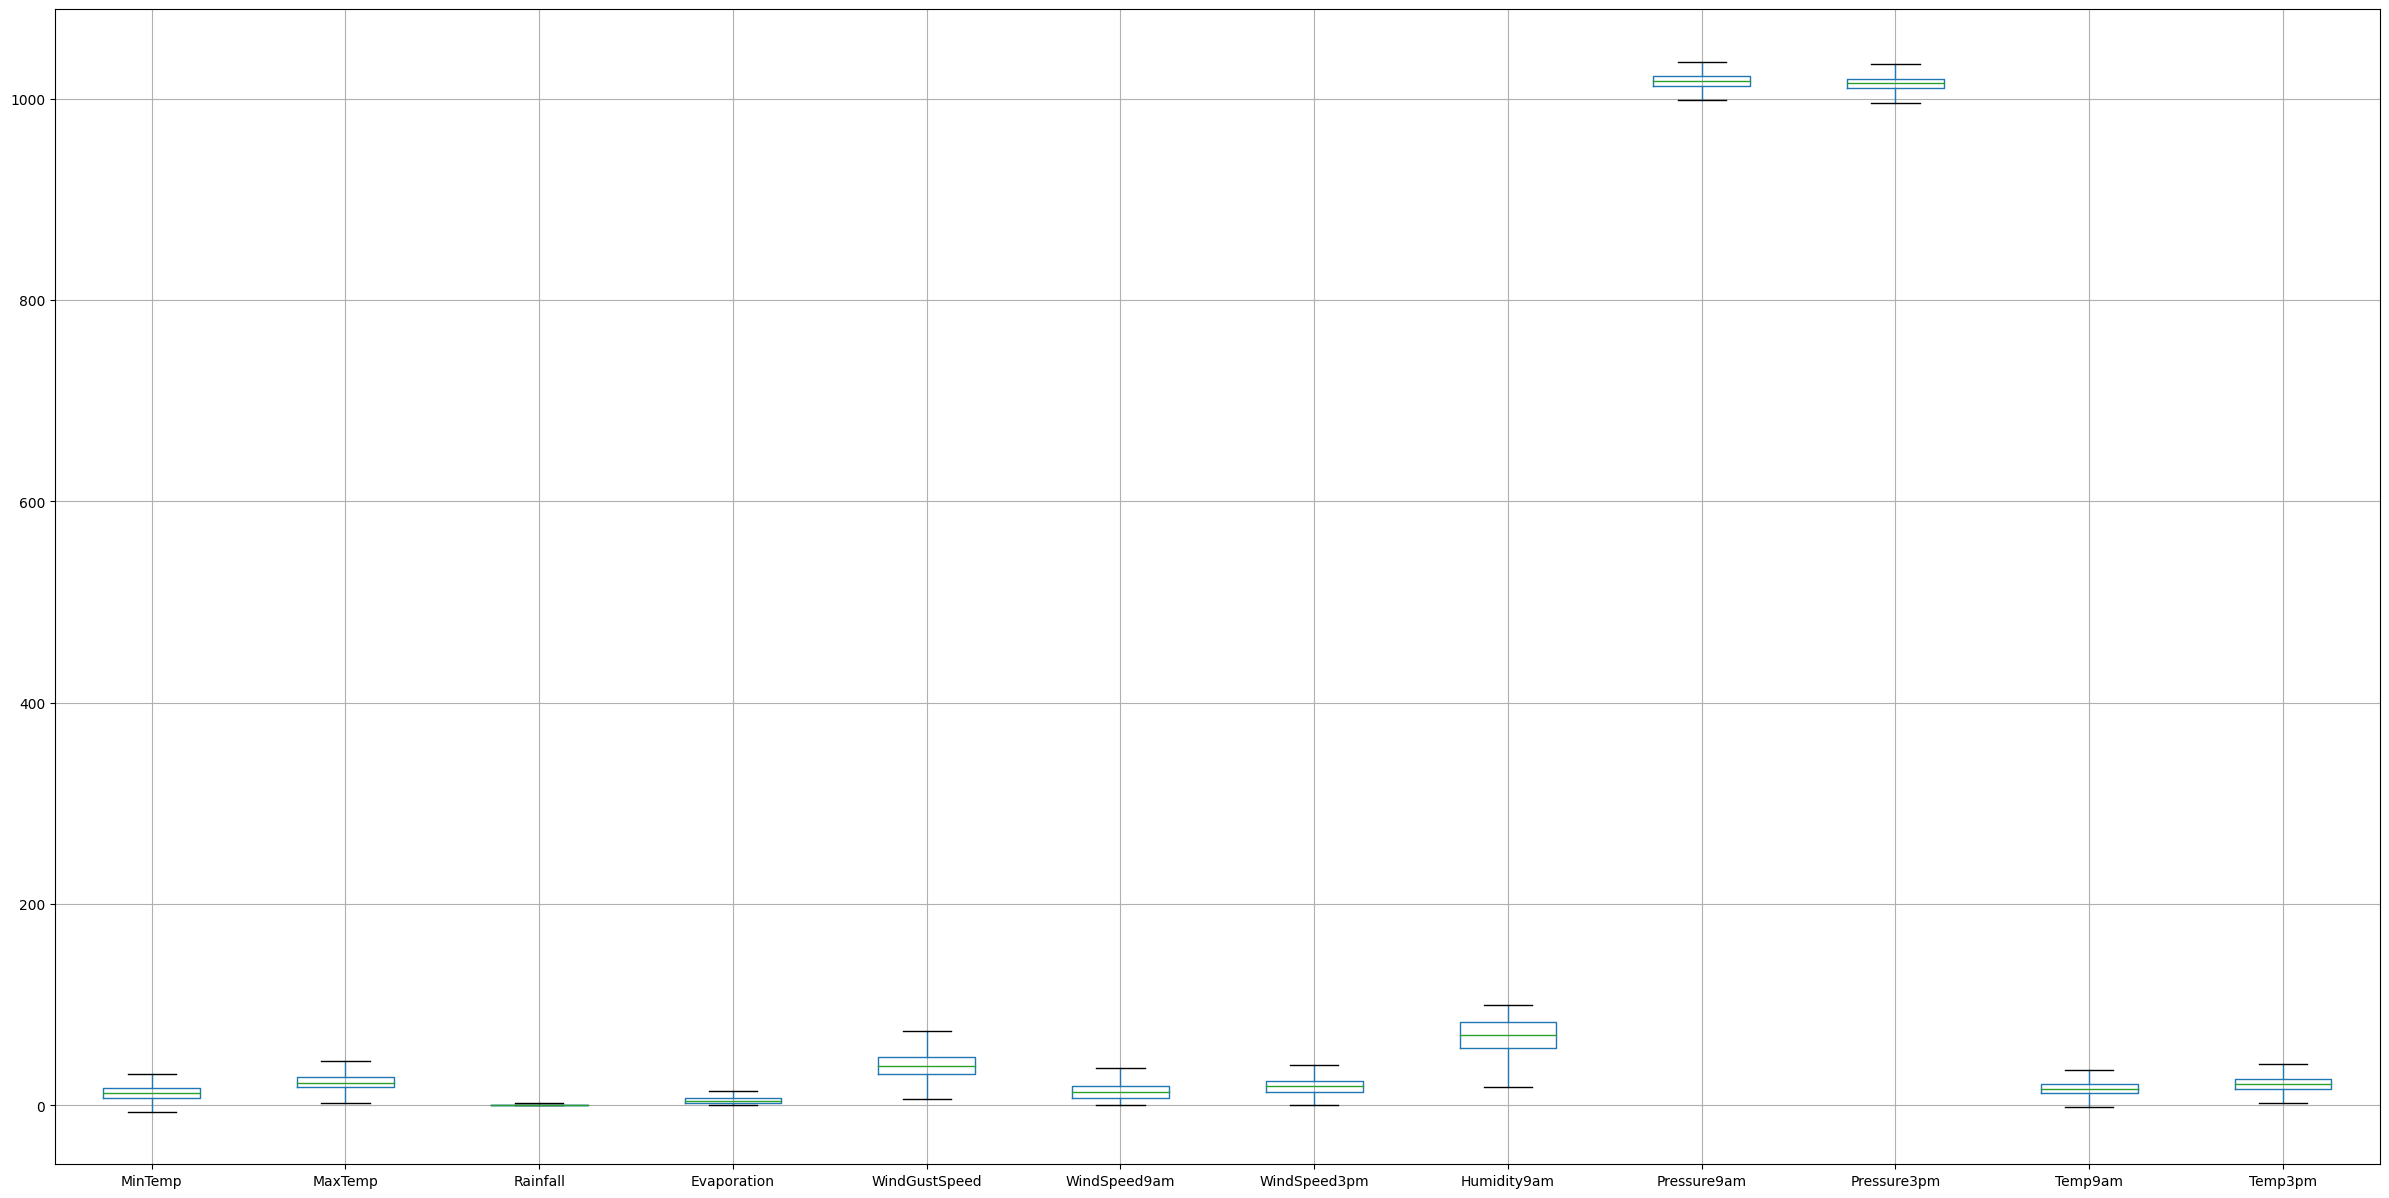

In [ ]:
#Menampilkan Box Plot
df[outlier_colum].boxplot(figsize = (30,15))
plt.show()

In [ ]:
#Mengecek ulang describe data
df[numerical].describe()

,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm
count,143975.000000,144199.000000,142199.000000,82670.000000,75625.000000,135197.000000,143693.000000,142398.000000,142806.000000,140953.000000,130395.000000,130432.000000,89572.000000,86102.000000,143693.000000,141851.000000
mean,12.194186,23.224781,0.487224,5.318667,7.611178,39.837792,13.951313,18.574162,68.933567,51.539116,1017.670297,1015.269781,4.447461,4.509930,16.991728,21.686191
std,6.397741,7.100632,0.792809,3.418079,3.785483,12.981866,8.607783,8.532467,18.876608,20.795902,7.025447,6.976954,2.887159,2.720357,6.481325,6.909048
min,-6.350000,2.450000,0.000000,0.000000,0.000000,6.000000,0.000000,0.000000,18.000000,0.000000,998.650000,996.000000,0.000000,0.000000,-1.650000,1.900000
25%,7.600000,17.900000,0.000000,2.600000,4.800000,31.000000,7.000000,13.000000,57.000000,37.000000,1012.900000,1010.400000,1.000000,2.000000,12.300000,16.600000
50%,12.000000,22.600000,0.000000,4.800000,8.400000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,5.000000,5.000000,16.700000,21.100000
75%,16.900000,28.200000,0.800000,7.400000,10.600000,48.000000,19.000000,24.000000,83.000000,66.000000,1022.400000,1020.000000,7.000000,7.000000,21.600000,26.400000
max,30.850000,43.650000,2.000000,14.600000,14.500000,73.500000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,9.000000,9.000000,35.550000,41.100000


Sudah tidak terdapat outlier pada data.

## 4. Mengatasi Missing Value
    Menghapus kolom dengan missing value >20%



In [ ]:
#melihat presentase missing value pada setiap colomn
missing_value = df.apply(lambda x: f'{((x.isnull().sum()/df.shape[0])*100).round(2)} %')
missing_value

Date               0.0 %
Location           0.0 %
MinTemp           1.02 %
MaxTemp           0.87 %
Rainfall          2.24 %
Evaporation      43.17 %
Sunshine         48.01 %
WindGustDir        7.1 %
WindGustSpeed     7.06 %
WindDir9am        7.26 %
WindDir3pm        2.91 %
WindSpeed9am      1.21 %
WindSpeed3pm      2.11 %
Humidity9am       1.82 %
Humidity3pm        3.1 %
Pressure9am      10.36 %
Pressure3pm      10.33 %
Cloud9am         38.42 %
Cloud3pm         40.81 %
Temp9am           1.21 %
Temp3pm           2.48 %
RainToday         2.24 %
RainTomorrow      2.25 %
dtype: object

In [ ]:
df.drop(["Evaporation","Sunshine","Cloud9am","Cloud3pm"],axis=1, inplace=True)
df.head(0)

,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow


Mengisi baris yang merupakan missing value
- Atribut bertipe numeric yang terdapat missing value akan ditangani dengan imputasi median
- Atribut bertipe object yang terdapat missing value akan ditangani dengan imputasi modus

### - Mengatasi Missing Value Column Numerical

In [ ]:
#Update col Numerical
numerical = [i for i in df.columns if i not in categorical]
numerical

['MinTemp',
 'MaxTemp',
 'Rainfall',
 'WindGustSpeed',
 'WindSpeed9am',
 'WindSpeed3pm',
 'Humidity9am',
 'Humidity3pm',
 'Pressure9am',
 'Pressure3pm',
 'Temp9am',
 'Temp3pm']

In [ ]:
#Mengganti missing value pada colum numerical dgn median
for num_col in numerical:
    df[num_col].fillna(df[num_col].median(),inplace=True)

### - Mengatasi Missing Value pada Column Categorical

In [ ]:
#Mengecek apakah terdapat missing value
df[numerical].isnull().values.any()

False

In [ ]:
# Mengganti missing value pada colum categorical dgn modus
for ca_col in categorical :
    df[ca_col].fillna(df[ca_col].mode()[0], inplace=True)

In [ ]:
#Mengecek apakah terdapat missing value
df[numerical].isnull().values.any()

False

Pada setiap column sudah tidak terdapat missing value

## 5. Mengecek Duplicate Data

In [ ]:
df.duplicated().sum()

0

Tidak terdapat data yang duplicate.

## 6. Memecah Atribut Date

In [ ]:
# Mengganti type data Date menjadi datetime
df['Date'] = pd.to_datetime(df['Date'])


In [ ]:
# Membuat atribut bari dari kolom Date
df['Day'] = df['Date'].dt.day
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

df.head(3)


,Date,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2008-12-01,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,1,12,2008
1,2008-12-02,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2,12,2008
2,2008-12-03,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,3,12,2008


Menghapus kolom __Date__

In [ ]:
df.drop(['Date'], axis = 1, inplace= True)
df.head(1)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,1,12,2008


# **E. EXPLORATORY DATA ANALYSIS (EDA)**

## 1. Descriptive Statistics

In [ ]:
#Melihat descripsi data pada kolom numerical
df.describe()

,MinTemp,MaxTemp,Rainfall,WindGustSpeed,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,Day,Month,Year
count,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000,145460.000000
mean,12.192203,23.219364,0.476301,39.778681,13.939757,18.583126,68.953025,51.553396,1017.663016,1015.262572,16.988184,21.671647,15.712258,6.399615,2012.769751
std,6.365030,7.070024,0.787183,12.517354,8.555976,8.442404,18.704151,20.471345,6.651731,6.606755,6.441917,6.823409,8.794789,3.427262,2.537684
min,-6.350000,2.450000,0.000000,6.000000,0.000000,0.000000,18.000000,0.000000,998.650000,996.000000,-1.650000,1.900000,1.000000,1.000000,2007.000000
25%,7.700000,18.000000,0.000000,31.000000,7.000000,13.000000,57.000000,37.000000,1013.500000,1011.100000,12.300000,16.700000,8.000000,3.000000,2011.000000
50%,12.000000,22.600000,0.000000,39.000000,13.000000,19.000000,70.000000,52.000000,1017.600000,1015.200000,16.700000,21.100000,16.000000,6.000000,2013.000000
75%,16.800000,28.200000,0.600000,46.000000,19.000000,24.000000,83.000000,65.000000,1021.800000,1019.400000,21.500000,26.200000,23.000000,9.000000,2015.000000
max,30.850000,43.650000,2.000000,73.500000,37.000000,40.500000,100.000000,100.000000,1036.650000,1034.400000,35.550000,41.100000,31.000000,12.000000,2017.000000


Kesimpulan :
- Rata-rat curah hujan 0.476
- Rata-rata kecepatan angin berada pada 39.77
- Suhu terendah pada suhu minimum mencapai -6.35 derajat
- Suhu tertinggi pada suhu maksimum mencapai 43.65 derajat

In [ ]:
# Melihat data pada kolom categorical
df.describe(include="O")

,Location,WindGustDir,WindDir9am,WindDir3pm,RainToday,RainTomorrow
count,145460,145460,145460,145460,145460,145460
unique,49,16,16,16,2,2
top,Canberra,W,N,SE,No,No
freq,3436,20241,22324,15066,113580,113583


Kesimpulan :
- WindGustDir (Arah Angin) yang paling sering terjadi adalah W
- WindDir9am (Arah angin pada jam 9pagi) yang paling sering terjadi adalah N
- WindDir3pm (Arah angin pada jam 3 sore) yang paling sering terjadi adalah SE
- Pada RainToday dan RainTomorrow sering tidak terjadi(No)


# 2. Visualisasi & Analisis

### - Perbandingan hujan dan tidak hujan pada RainToday dan RainTomrrow

In [ ]:
#Melihat bayak terjadi hujan dan tidak hujan pada Rain Today
df["RainToday"].value_counts()

No     113580
Yes     31880
Name: RainToday, dtype: int64

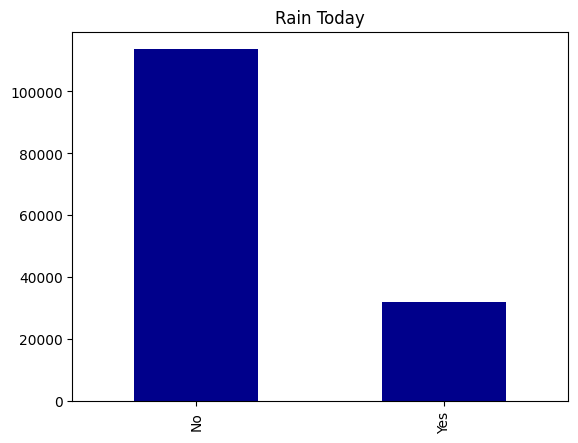

In [ ]:
plt.subplot()
df['RainToday'].value_counts().plot.bar(color='darkblue')
plt.title('Rain Today')
plt.show()

Kesimpulan:

Pada RainToday, jumlah  tidak terjadi hujan (No) ada sebanyak 113580 dan jumlah terjadi hujan(Yes) ada sebanyak 31880. Terdapat perbedaan yang sangat jauh, yaitu sekitar 81700 kejadian.

In [ ]:
#Melihat bayak terjadi hujan dan tidak hujan pada Rain Today
df["RainTomorrow"].value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

Text(0.5, 1.0, 'Rain Tomorrow')

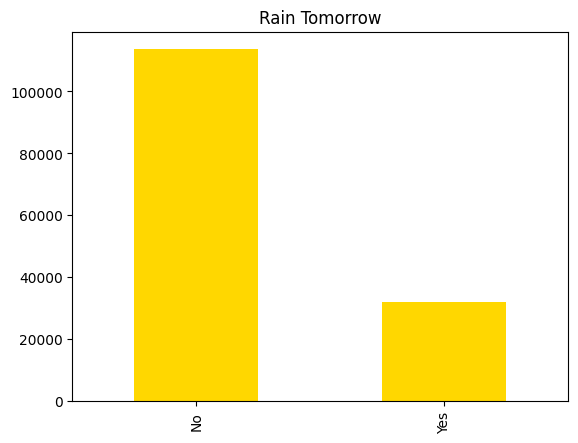

In [ ]:
plt.subplot()
df['RainTomorrow'].value_counts().plot.bar(color='gold')
plt.title('Rain Tomorrow')


Pada RainTomorrow, jumlah  tidak terjadi hujan (No) ada sebanyak 113583 dan jumlah terjadi hujan(Yes) ada sebanyak 31877. Terdapat perbedaan yang sangat jauh, yaitu sekitar 81706 kejadian.

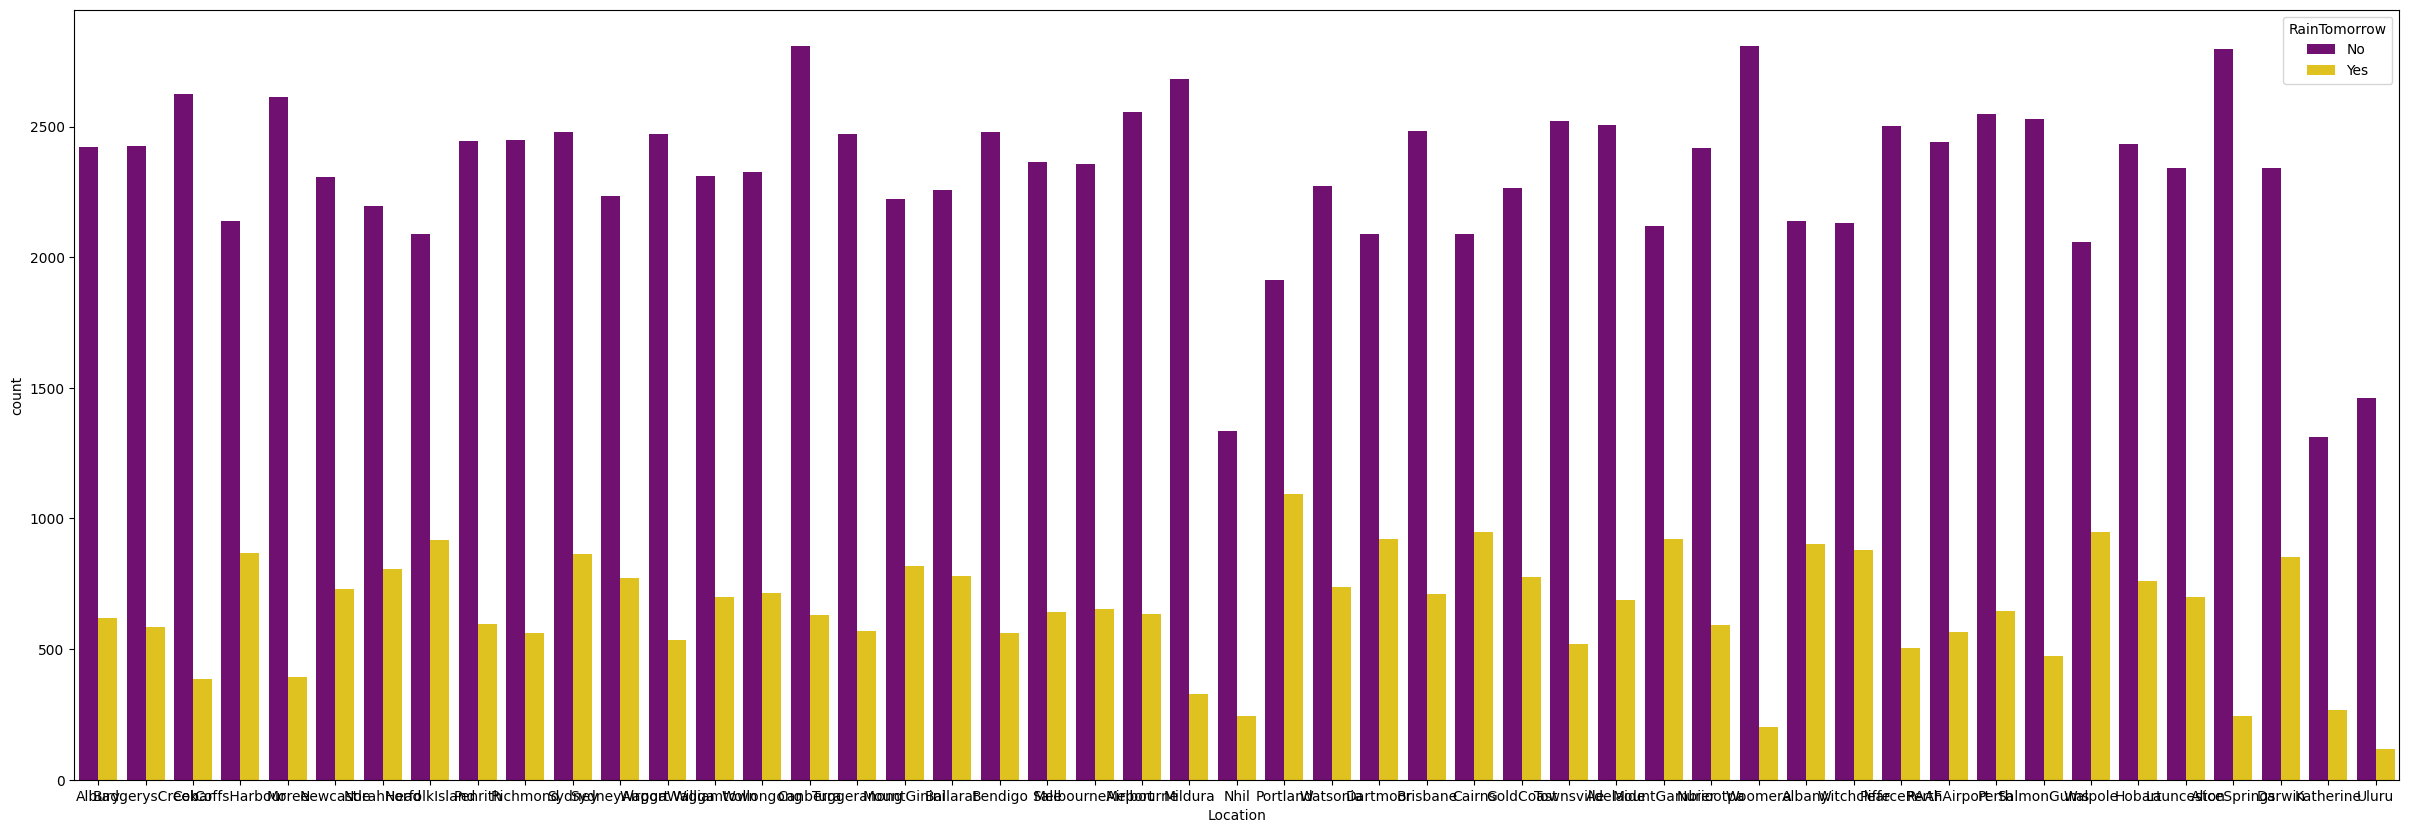

In [ ]:
#Melihat RainTomorrow pada setiap lokasi
plt.figure(figsize=(30,10))
ax = sns.countplot(x="Location", hue="RainTomorrow", data=df, palette={"No": "purple", "Yes": "gold"})

Kesimpulan :

RainTomorrow pada setiap lokasi memiliki intensitas yang berbeda

### - Apakah RainTomorrow diperngaruhi oleh MinTemp dan MaxTemp

<Axes: xlabel='MinTemp', ylabel='MaxTemp'>

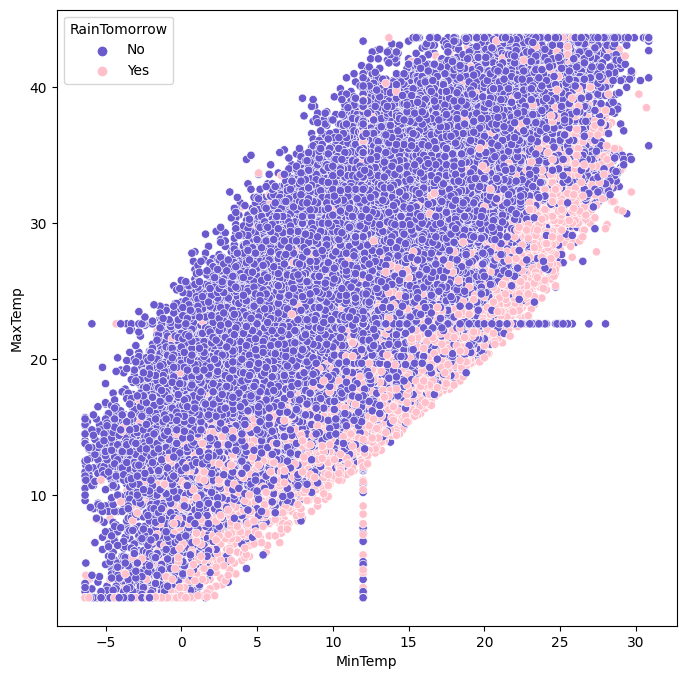

In [ ]:
plt.figure(figsize=(8,8))
cols = ['slateblue','pink']
sns.scatterplot(x = 'MinTemp' , y = 'MaxTemp', hue = 'RainTomorrow', palette = cols, data = df)

Kesimpulan:

Titik pink menunjukkan bahwa besok akan turun hujan dan titik biru menunjukkan bahwa tidak akan turun hujan. Dari plot diatas dpt dilihat, bahwa terdapat hubungan yang kuat antara MinTemp dan MaxTemp dengan RainTomorrow. Sehingga, ada peluang hujan yang lebih besar tergantung dengan MinTemp dan MaxTemp nya.

### - Perbandingan antara jumlah WindGustDir, WindDir9am dan WindDir3pm

Text(0.5, 1.0, 'Wind Gust Direction')

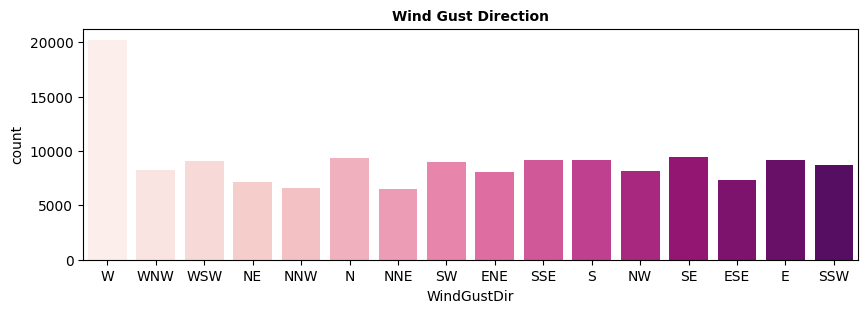

In [ ]:
# Melihat jumlah WindGustDir
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='WindGustDir', palette='RdPu')
plt.title("Wind Gust Direction", fontweight='bold', fontsize=10)


In [ ]:
df['WindGustDir'].value_counts().head(5)

W      20241
SE      9418
N       9313
SSE     9216
E       9181
Name: WindGustDir, dtype: int64

Kesimpulan :

Berdasarkan visualisasi diatas, diperoleh bahw pada WindGustDir, arah hembusan angin terkuat dalam 24 jam hingga tengah malam paling banyak yaitu ke arah W (West) dengan total data 20.241

Text(0.5, 1.0, 'Wind Direction at 9AM')

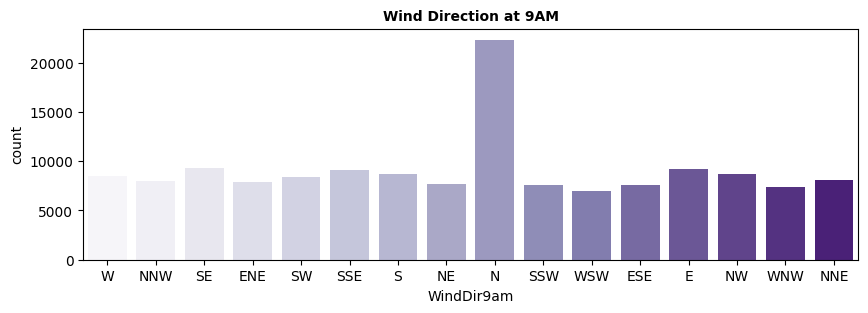

In [ ]:
# Melihat WindDir9am
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='WindDir9am', palette='Purples')
plt.title("Wind Direction at 9AM", fontweight='bold', fontsize=10)

In [ ]:
df['WindDir9am'].value_counts().head(5)

N      22324
SE      9287
E       9176
SSE     9112
NW      8749
Name: WindDir9am, dtype: int64

Kesimpulan :

Berdasarkan visualisasi diatas, diperoleh bahwa pada WinDir9am, arah angin pada jam 9 pagi paling banyak yaitu ke arah N (North) dengan jumlah data 22.324

Text(0.5, 1.0, 'Wind Direction at 3PM')

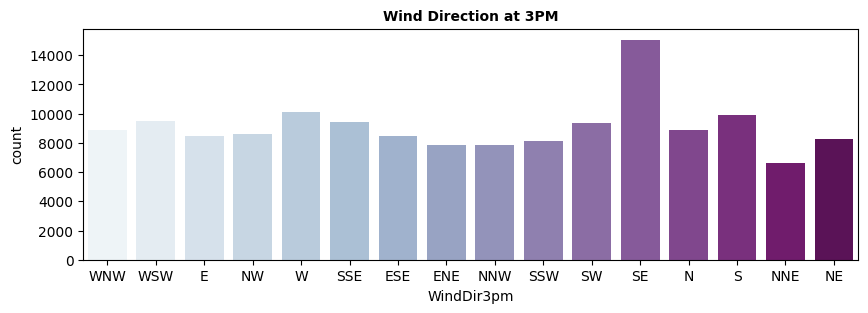

In [ ]:
# Melihat WindDir3pm
plt.figure(figsize=(10, 3))
sns.countplot(data=df, x='WindDir3pm', palette='BuPu')
plt.title("Wind Direction at 3PM", fontweight='bold', fontsize=10)

In [ ]:
df['WindDir3pm'].value_counts().head(5)

SE     15066
W      10110
S       9926
WSW     9518
SSE     9399
Name: WindDir3pm, dtype: int64

Kesimpulan :

Berdasarkan visualisasi diatas, diperoleh bahwa WinDir3pm, arah angin pada jam 3 malam paling banyak yaitu ke arah SE (South-east) dengan jumlah data 15.066

### - Lokasi dengan jumlah curah hujan paling tinggi

## 3. Analisis Korelasi

In [ ]:
df.head(3)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,Albury,13.4,22.9,0.6,W,44.0,W,WNW,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,No,No,1,12,2008
1,Albury,7.4,25.1,0.0,WNW,44.0,NNW,WSW,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,No,No,2,12,2008
2,Albury,12.9,25.7,0.0,WSW,46.0,W,WSW,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,No,No,3,12,2008


## 1. Melakukan Label Encoding

In [ ]:
# Membuat objek LabelEncoder untuk melakukan encoding pada setiap kolom.
label_encoder = preprocessing.LabelEncoder()

# Mengambil tipe data object pada dataset dan di simpan di df_encode_cor1
df_category = df.select_dtypes(include='object')
df_encode = df.copy()

for column in df_category.columns:
    df_encode[column] = label_encoder.fit_transform(df[column])

In [ ]:
df_encode.head(5)

,Location,MinTemp,MaxTemp,Rainfall,WindGustDir,WindGustSpeed,WindDir9am,WindDir3pm,WindSpeed9am,WindSpeed3pm,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Temp9am,Temp3pm,RainToday,RainTomorrow,Day,Month,Year
0,2,13.4,22.9,0.6,13,44.0,13,14,20.0,24.0,71.0,22.0,1007.7,1007.1,16.9,21.8,0,0,1,12,2008
1,2,7.4,25.1,0.0,14,44.0,6,15,4.0,22.0,44.0,25.0,1010.6,1007.8,17.2,24.3,0,0,2,12,2008
2,2,12.9,25.7,0.0,15,46.0,13,15,19.0,26.0,38.0,30.0,1007.6,1008.7,21.0,23.2,0,0,3,12,2008
3,2,9.2,28.0,0.0,4,24.0,9,0,11.0,9.0,45.0,16.0,1017.6,1012.8,18.1,26.5,0,0,4,12,2008
4,2,17.5,32.3,1.0,13,41.0,1,7,7.0,20.0,82.0,33.0,1010.8,1006.0,17.8,29.7,0,0,5,12,2008


In [ ]:
def heat_map(nama_df ,list_kolom):
    df_heatmap = nama_df[list_kolom] #Memasukkan data kolom tersebut kedalam variabel baru
    plt.figure(figsize=(20,23)) #Mengatur ukuran

    #Membuat heat map dengan menampilkan nilai dari korelasi
    sns.heatmap(df_heatmap.corr(),
                annot=True,
                cmap='Blues',
                linewidths=.5,
                linecolor='black',
                square=True,
                fmt='.2f')

Melihat HearMap untuk melihat korelasi antar atribut

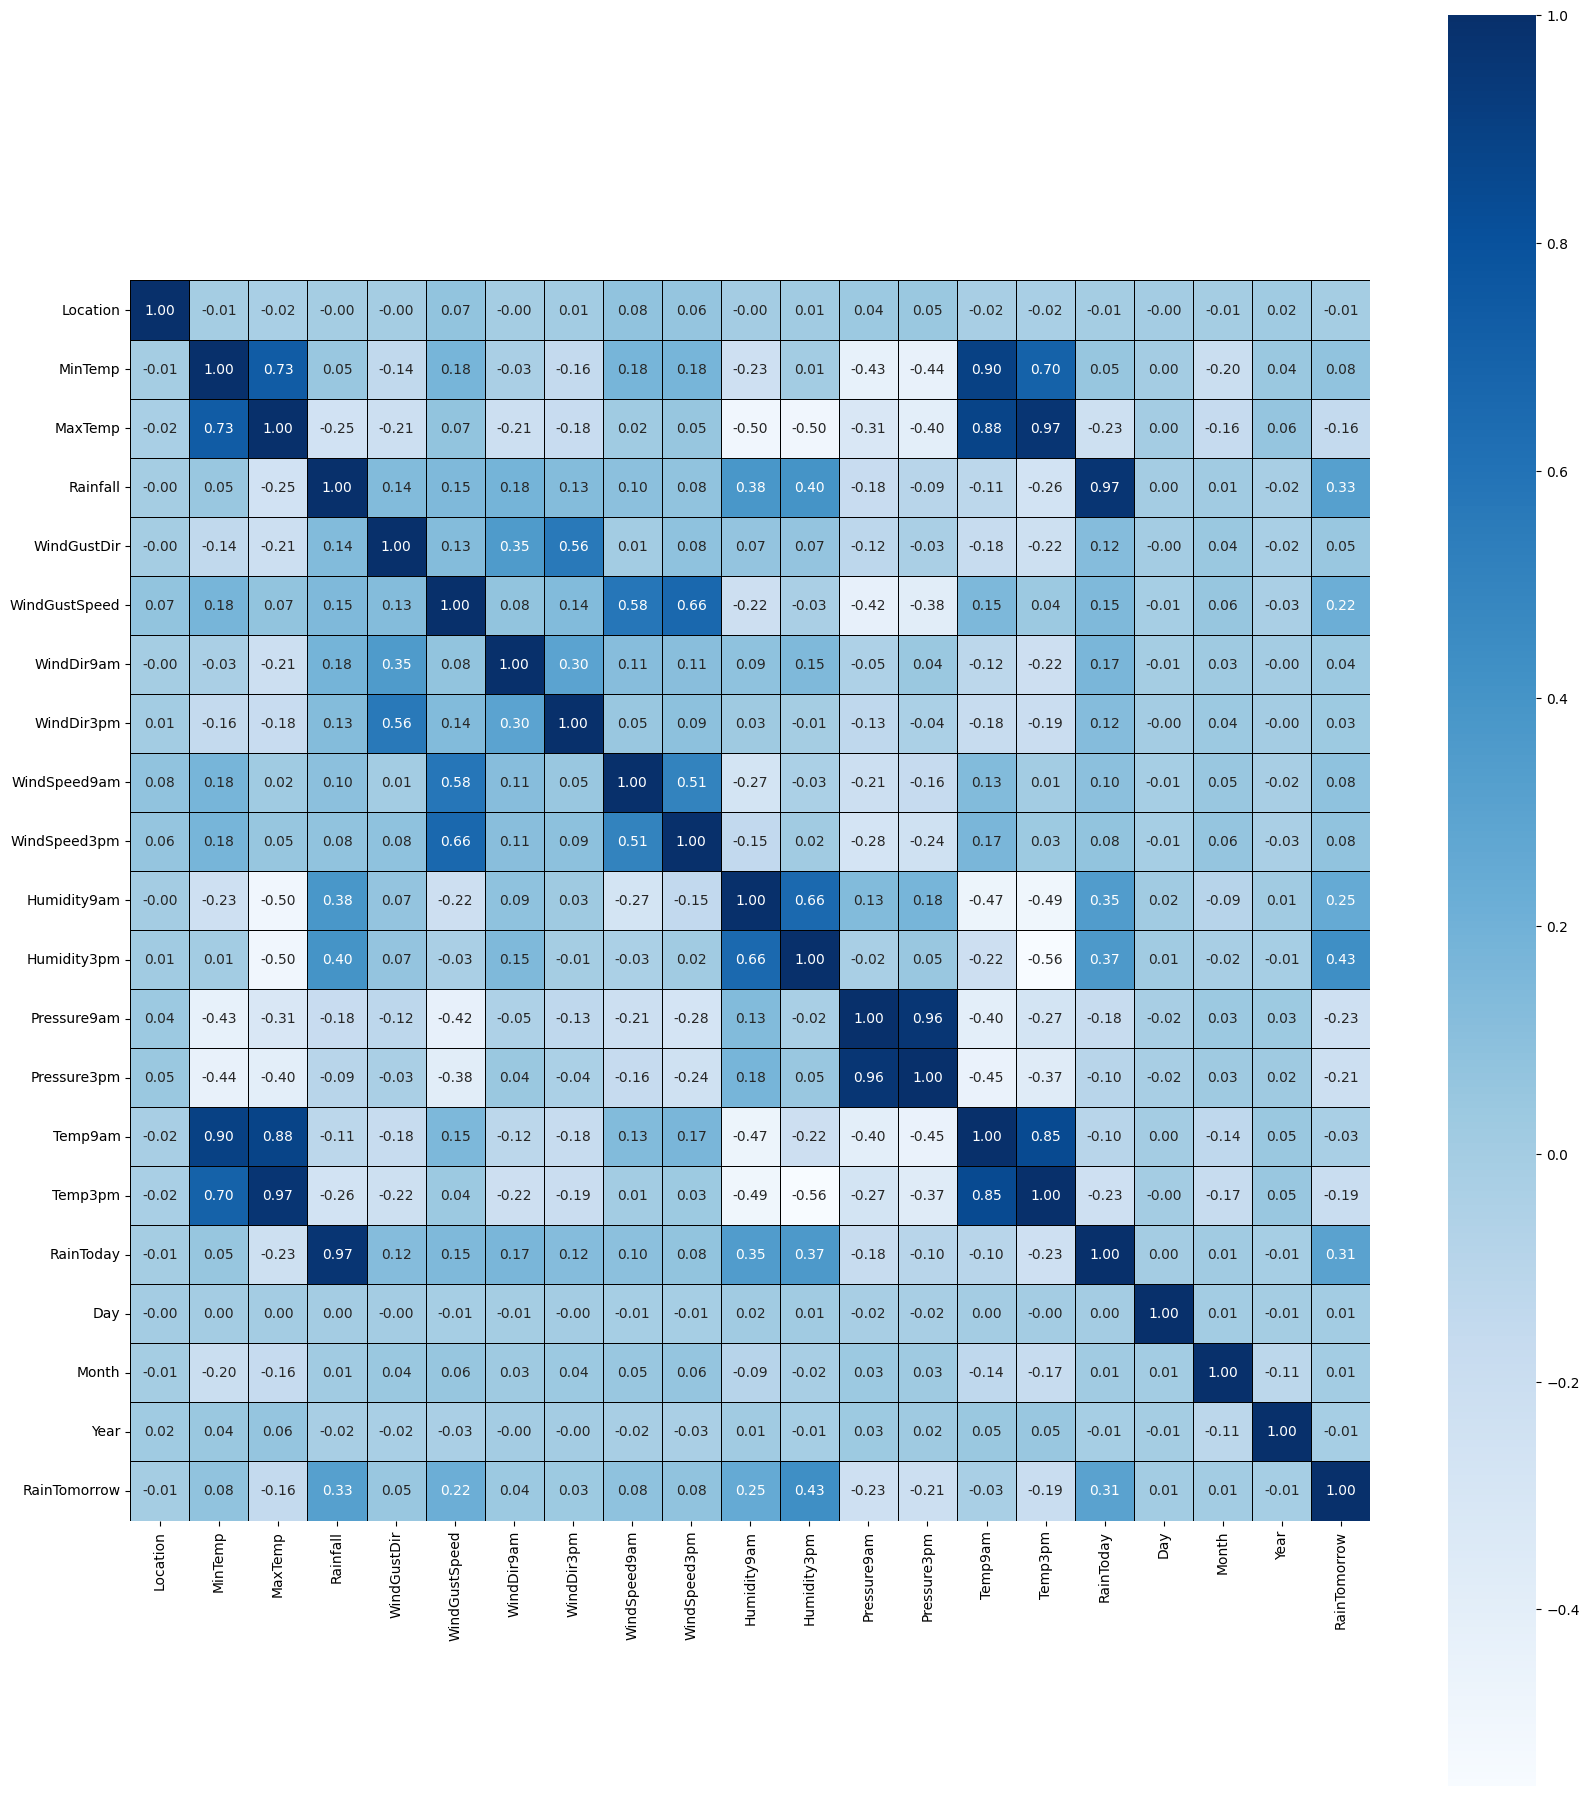

In [ ]:
heat_map_modeling = ['Location','MinTemp','MaxTemp','Rainfall','WindGustDir','WindGustSpeed','WindDir9am',
                     'WindDir3pm','WindSpeed9am','WindSpeed3pm','Humidity9am','Humidity3pm','Pressure9am',
                     'Pressure3pm','Temp9am','Temp3pm','RainToday','Day','Month','Year', 'RainTomorrow']
heat_map(df_encode ,heat_map_modeling)

Berdasarkan HeatMap diatas, dipilih beberapa kolom yang memiliki korelasi cukup tinggi dengan atribut __RainTomorrow__ yang kemudian digunakan untuk modelling. Kolom tersebut diantaranya adalah sebagai berikut:
1. `Location`       : -0.005
2. `MinTemp`        : 0.082
3. `Rainfall`       : 0.325
4. `WindGustDir`    : 0.049
5. `WindGustSpeed`  : 0.22
6. `WindSpeed9am`   : 0.08
7. `Humidityy3pm`   : 0.43
8. `Pressure9am`    : -0.23
9. `Temp3pm`        : -0.19
10. `RainToday`      : 0.31


In [ ]:
df_fix = pd.DataFrame(df_encode.loc[:,['Location','MinTemp','Rainfall','WindGustDir',
                                       'WindGustSpeed','WindSpeed9am','Humidity3pm','Pressure9am',
                                      'Temp3pm','RainToday', 'RainTomorrow']])

df_fix.head()

,Location,MinTemp,Rainfall,WindGustDir,WindGustSpeed,WindSpeed9am,Humidity3pm,Pressure9am,Temp3pm,RainToday,RainTomorrow
0,2,13.4,0.6,13,44.0,20.0,22.0,1007.7,21.8,0,0
1,2,7.4,0.0,14,44.0,4.0,25.0,1010.6,24.3,0,0
2,2,12.9,0.0,15,46.0,19.0,30.0,1007.6,23.2,0,0
3,2,9.2,0.0,4,24.0,11.0,16.0,1017.6,26.5,0,0
4,2,17.5,1.0,13,41.0,7.0,33.0,1010.8,29.7,0,0


# __F. DATA PREPROCESSING__
-----------------------------------------------------------

## 1. Melihat keunikan Data (Cardinality)

In [ ]:
df_fix.nunique()

Location          49
MinTemp          369
Rainfall          21
WindGustDir       16
WindGustSpeed     38
WindSpeed9am      21
Humidity3pm      101
Pressure9am      382
Temp3pm          393
RainToday          2
RainTomorrow       2
dtype: int64

Keterangan:

Dapat dilihat bahwa number of categories (unique value) dari MinTemp, Pressure9am dan Temp3pm sangat banyak atau biasa disebut dengan istilah high cardinality. Karena kita tidak bisa mereduced temperature dan tekanan yang tentunya dapat berbeda setiap harinya.

In [ ]:
df['RainTomorrow'].value_counts()

No     113583
Yes     31877
Name: RainTomorrow, dtype: int64

## 2. Feature Selection

In [ ]:
X = df_fix.drop(['RainTomorrow'], axis=1)
y = df_fix['RainTomorrow']


In [ ]:
X.shape

(145460, 10)

In [ ]:
y.shape

(145460,)

Melakukan feature selection menggunakan library *ExtraTreesRegressor* yang mengambil 10 atribut paling penting

In [ ]:
ExtraTree_model = ExtraTreesRegressor()
ExtraTree_model.fit(X,y)

ExtraTreesRegressor()

In [ ]:
ExtraTree_model.feature_importances_

array([0.08383407, 0.09607733, 0.0586973 , 0.07807926, 0.09837564,
       0.08326901, 0.25737062, 0.1058034 , 0.09259555, 0.04589782])

<Axes: >

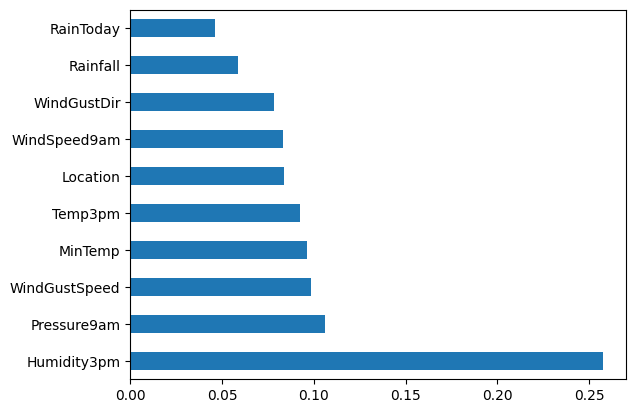

In [ ]:
feature_imp = pd.Series(ExtraTree_model.feature_importances_,index=X.columns)
feature_imp.nlargest(10).plot(kind='barh')

In [ ]:
feature_imp

Location         0.083834
MinTemp          0.096077
Rainfall         0.058697
WindGustDir      0.078079
WindGustSpeed    0.098376
WindSpeed9am     0.083269
Humidity3pm      0.257371
Pressure9am      0.105803
Temp3pm          0.092596
RainToday        0.045898
dtype: float64

In [ ]:
from sklearn.feature_selection import SelectKBest, f_classif

selector = SelectKBest(f_classif, k = 10)
X_new = selector.fit_transform(X, y)
names = X.columns.values[selector.get_support()]
scores = selector.scores_[selector.get_support()]
names_scores = list(zip(names, scores))
ns_df = pd.DataFrame(data = names_scores, columns=['Feat_names', 'F_Scores'])

ns_df_sorted = ns_df.sort_values(['F_Scores', 'Feat_names'], ascending = [False, True])
print(ns_df_sorted)

      Feat_names      F_Scores
6    Humidity3pm  33596.712523
2       Rainfall  17214.384009
9      RainToday  14999.484212
7    Pressure9am   8090.041912
4  WindGustSpeed   7276.545193
8        Temp3pm   5308.740097
5   WindSpeed9am   1057.260582
1        MinTemp    990.795335
3    WindGustDir    346.852202
0       Location      4.396955


In [ ]:
X_fit = df_fix[['Location','Humidity3pm','Rainfall','RainToday','Pressure9am']]
X_fit.head()

,Location,Humidity3pm,Rainfall,RainToday,Pressure9am
0,2,22.0,0.6,0,1007.7
1,2,25.0,0.0,0,1010.6
2,2,30.0,0.0,0,1007.6
3,2,16.0,0.0,0,1017.6
4,2,33.0,1.0,0,1010.8


In [ ]:
X_fit.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 145460 entries, 0 to 145459
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Location     145460 non-null  int64  
 1   Humidity3pm  145460 non-null  float64
 2   Rainfall     145460 non-null  float64
 3   RainToday    145460 non-null  int64  
 4   Pressure9am  145460 non-null  float64
dtypes: float64(3), int64(2)
memory usage: 5.5 MB


## 3. Feature Scaling

In [ ]:
# Memisahkan data menjadi data training dan data testing
X_train, X_test, y_train, y_test = train_test_split(X_fit, y, test_size=0.20, random_state=0)

In [ ]:
X_fit = df_fix[['Location','Humidity3pm','Rainfall','RainToday','Pressure9am']]
X_fit.head()

,Location,Humidity3pm,Rainfall,RainToday,Pressure9am
0,2,22.0,0.6,0,1007.7
1,2,25.0,0.0,0,1010.6
2,2,30.0,0.0,0,1007.6
3,2,16.0,0.0,0,1017.6
4,2,33.0,1.0,0,1010.8


In [ ]:
scaler = StandardScaler()

In [ ]:
variables_inputs = [i for i in X_fit.columns if i != 'RainTomorrow']

In [ ]:
X_fit[variables_inputs] = scaler.fit_transform(X_fit[variables_inputs])
X_fit.head()

,Location,Humidity3pm,Rainfall,RainToday,Pressure9am
0,-1.531666,-1.443652,0.157141,-0.529795,-1.497813
1,-1.531666,-1.297105,-0.605072,-0.529795,-1.061835
2,-1.531666,-1.052860,-0.605072,-0.529795,-1.512847
3,-1.531666,-1.736746,-0.605072,-0.529795,-0.009474
4,-1.531666,-0.906314,0.665284,-0.529795,-1.031767


In [ ]:
X_fit.describe()

,Location,Humidity3pm,Rainfall,RainToday,Pressure9am
count,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05,1.454600e+05
mean,7.815677e-18,-8.440931e-17,1.160628e-16,-8.988029e-18,-2.981524e-14
std,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00,1.000003e+00
min,-1.672228e+00,-2.518329e+00,-6.050724e-01,-5.297955e-01,-2.858366e+00
25%,-8.991390e-01,-7.109179e-01,-6.050724e-01,-5.297955e-01,-6.258567e-01
50%,1.451130e-02,2.181612e-02,-6.050724e-01,-5.297955e-01,-9.473700e-03
75%,8.578808e-01,6.568523e-01,1.571413e-01,-5.297955e-01,6.219430e-01
max,1.701250e+00,2.366565e+00,1.935640e+00,1.887521e+00,2.854452e+00


# G. MODELLING
-----------------

## 1. Logistic Regression

In [ ]:
#Pendefinisian model
model_logreg = LogisticRegression()

In [ ]:
# model training
model_logreg.fit(X_train, y_train.ravel())

LogisticRegression()

In [ ]:
# Model Evaluation
# Mengevaluasi model data train
logreg_PredictTrain = model_logreg.predict(X_train)

print("Accuracy :", model_logreg.score(X_train, y_train))

Accuracy : 0.8303055822906641


In [ ]:
# Mengevaluasi model data test
logregY_pred = model_logreg.predict(X_test)

print("Accuracy :", model_logreg.score(X_test, y_test))

Accuracy : 0.8297126357761584


In [ ]:
# confusion matrix
print("Confusion Matrix")
print("{0}".format(metrics.confusion_matrix(y_test, logregY_pred)))

Confusion Matrix
[[21696  1030]
 [ 3924  2442]]


In [ ]:
# Classification report
print("Classification Report :")
print(metrics.classification_report(y_test, logregY_pred))

Classification Report :
              precision    recall  f1-score   support

           0       0.85      0.95      0.90     22726
           1       0.70      0.38      0.50      6366

    accuracy                           0.83     29092
   macro avg       0.78      0.67      0.70     29092
weighted avg       0.82      0.83      0.81     29092



In [ ]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, logregY_pred))
print('Presisi :', precision_score(y_test,logregY_pred))
print('Recall :', recall_score(y_test,logregY_pred))
print('F1 Score :', f1_score(y_test,logregY_pred))

Ringkasan Evaluasi Model
Akurasi : 0.8297126357761584
Presisi : 0.7033410138248848
Recall : 0.3836003770028275
F1 Score : 0.49644236633462085


Prediksi dengan data Aktual

In [ ]:
y_test

138175    1
38638     1
124058    0
99214     0
25097     0
         ..
133493    0
43818     0
28118     1
120179    0
30398     0
Name: RainTomorrow, Length: 29092, dtype: int64

In [ ]:
logregY_pred

array([0, 0, 0, ..., 0, 0, 0])

In [ ]:
kondisi = pd.DataFrame({'Actual':y_test, 'Predicted':logregY_pred})
kondisi.head()

,Actual,Predicted
138175,1,0
38638,1,0
124058,0,0
99214,0,1
25097,0,0


<Axes: title={'center': 'Logistic Regression Confusion Matrix'}>

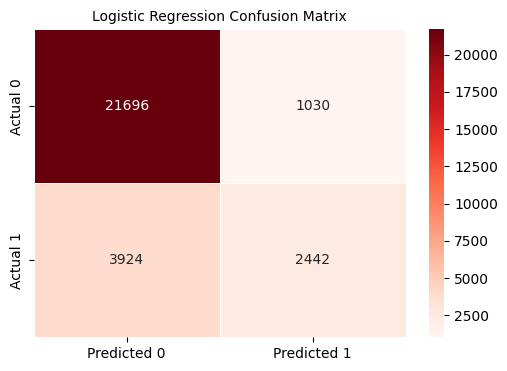

In [ ]:
logreg_cm = confusion_matrix(y_test, logregY_pred)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("Logistic Regression Confusion Matrix", fontsize=10)
sns.heatmap(logreg_cm, annot=True, fmt="d", linewidths=.5, cmap = 'Reds',
            xticklabels = ('Predicted 0','Predicted 1'),
            yticklabels = ('Actual 0','Actual 1'))

## 2. SVM

In [ ]:
svm_model = SVC(kernel='linear', random_state=42)

In [ ]:
#model training
svm_model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [ ]:
# Model Evaluation
svm_Ypred = svm_model.predict(X_test)


In [ ]:
# Mengevaluasi model data train
svm_predict_train = svm_model.predict(X_train)

print("Accuracy :", metrics.accuracy_score(y_train, svm_predict_train))

Accuracy : 0.831293826481507


In [ ]:
# Mengevaluasi model data test
svm_predict_test = svm_model.predict(X_test)

print("Accuracy :", metrics.accuracy_score(y_test, svm_predict_test))

Accuracy : 0.8347999450020624


In [ ]:
# confusion matrix
print("Confusion Matrix :")
print("{0}".format(metrics.confusion_matrix(y_test, svm_predict_test)))

Confusion Matrix :
[[21207  1519]
 [ 3287  3079]]


In [ ]:
# Classification report
print("Classification Report :")
print(metrics.classification_report(y_test, svm_predict_test))

Classification Report :
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     22726
           1       0.67      0.48      0.56      6366

    accuracy                           0.83     29092
   macro avg       0.77      0.71      0.73     29092
weighted avg       0.82      0.83      0.82     29092



In [ ]:
print('Ringkasan Evaluasi Model')
print('Akurasi :', accuracy_score(y_test, svm_Ypred))
print('Presisi :', precision_score(y_test,svm_Ypred))
print('Recall :', recall_score(y_test,svm_Ypred))
print('F1 Score :', f1_score(y_test,svm_Ypred))

Ringkasan Evaluasi Model
Akurasi : 0.8347999450020624
Presisi : 0.6696389734667246
Recall : 0.48366321080741437
F1 Score : 0.5616563298066398


Prediksi dengan data Aktual

In [ ]:
svm_Ypred

array([0, 0, 0, ..., 1, 0, 0])

In [ ]:
kondisi2 = pd.DataFrame({'Actual':y_test, 'Predicted':svm_Ypred})
kondisi2.head()

,Actual,Predicted
138175,1,0
38638,1,0
124058,0,0
99214,0,1
25097,0,0


<Axes: title={'center': 'SVM Confusion Matrix'}>

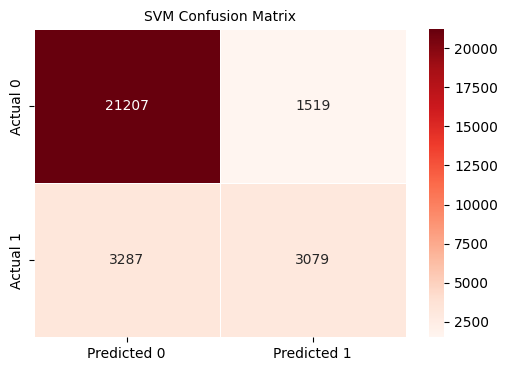

In [ ]:
svm_cm = confusion_matrix(y_test, svm_Ypred)

fig, ax = plt.subplots(figsize=(6,4))
ax.set_title("SVM Confusion Matrix", fontsize=10)
sns.heatmap(svm_cm, annot=True,  fmt="d", linewidths=.5, cmap = 'Reds',
            xticklabels = ('Predicted 0','Predicted 1'),
            yticklabels = ('Actual 0','Actual 1'))

# H. MODEL IMPROVEMENT
menggunakan K-Fold Cross-Validation

## 1. Logistic Regression

In [ ]:
X = df_fix.drop(['RainTomorrow'], axis=1).values
y = df_fix['RainTomorrow'].values

# Tentukan jumlah fold
k = 5

# Gunakan cross_val_score untuk menghitung skor validasi silang (R^2) untuk setiap fold
scores = cross_val_score(model_logreg, X, y, cv=k)

# Cetak skor validasi silang
print(f'Skor validasi silang untuk setiap fold : {scores}')
print(f'Rata-rata skor validasi silang         : {scores.mean()}')

Skor validasi silang untuk setiap fold : [0.83143132 0.82435034 0.83950914 0.83792795 0.84421834]
Rata-rata skor validasi silang         : 0.8354874192217793


## 2. SVM

In [ ]:
X = df_fix.drop(['RainTomorrow'], axis=1).values
y = df_fix['RainTomorrow'].values

# Tentukan jumlah fold
k = 5

# Gunakan cross_val_score untuk menghitung skor validasi silang (R^2) untuk setiap fold
scores = cross_val_score(SVC(), X, y, cv = k)

# Cetak skor validasi silang
print(f'Skor validasi silang untuk setiap fold : {scores}')
print(f'Rata-rata skor validasi silang         : {scores.mean()}')

Skor validasi silang untuk setiap fold : [0.83125945 0.8213942  0.84346212 0.83380311 0.83710298]
Rata-rata skor validasi silang         : 0.8334043723360376


# I. MODEL INFERENCE

In [ ]:
# Memasukkan data dengan location=0.54, Humidity3pm=0.11,  rainfall=0.001,RainToday=1
# Pressure9am=0.37,
input_data = np.array([[0.54, 0.11, 0.001, 1, 0.37]])
prediction = svm_model.predict(input_data)
print("prediksi hujan :", prediction)

prediksi hujan : [1]


In [ ]:
model_inference = {'Location':[0,15,35],
                   'Humidity3pm' :[11,1.25,2.3],
                   'Rainfall':[0.008263, 0.017258, 0.000129],
                   'RainToday':[0, 1, 0],
                   'Pressure9am':[10.85,4.5,12]
                  }
model_inference = pd.DataFrame(model_inference)
model_inference

,Location,Humidity3pm,Rainfall,RainToday,Pressure9am
0,0,11.00,0.008263,0,10.85
1,15,1.25,0.017258,1,4.50
2,35,2.30,0.000129,0,12.00


In [ ]:
prediksi = svm_model.predict(model_inference)
prediksi

array([1, 1, 1])

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.838925,0.715274,0.438423,0.543631
1,SVM,0.839131,0.701482,0.461043,0.556398


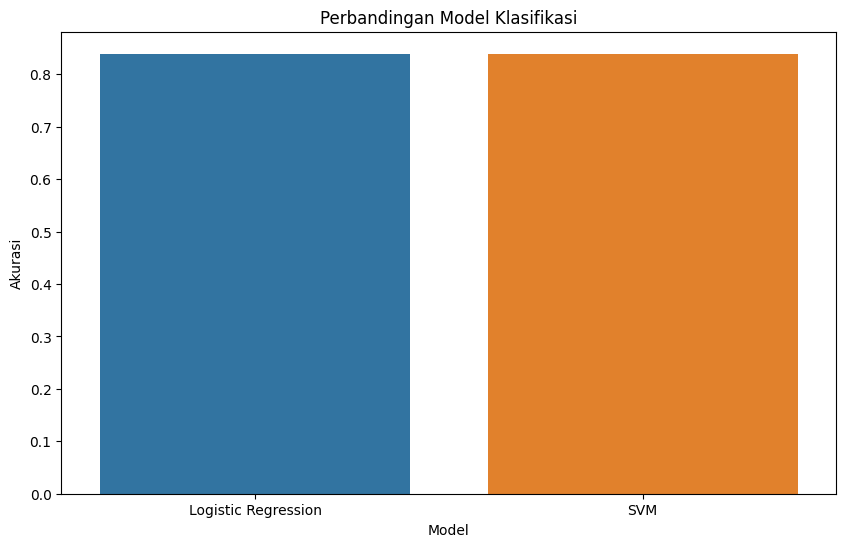

In [ ]:
# Initialize models
models = [('Logistic Regression', model_logreg),
          ('SVM', svm_model),]

# Data split
x = df_fix.drop(columns=['RainTomorrow'],axis=1).values
y = df_fix['RainTomorrow'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

# Fungsi untuk evaluasi model
def evaluate_model(model, X_test, y_test):
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    return accuracy, precision, recall, f1

# Melatih dan mengevaluasi model
results = []
for name, model in models:
    model.fit(X_train, y_train)
    accuracy, precision, recall, f1 = evaluate_model(model, X_test, y_test)
    results.append([name, accuracy, precision, recall, f1])

# Menampilkan hasil dalam tabel perbandingan
results_df = pd.DataFrame(results, columns=['Model', 'Accuracy', 'Precision', 'Recall', 'F1 Score'])
display(results_df)

# Visualisasi hasil dalam bentuk bar plot
plt.figure(figsize=(10, 6))
sns.color_palette("Set2")
sns.barplot(x='Model', y='Accuracy', data=results_df)
plt.title('Perbandingan Model Klasifikasi')
plt.xticks(rotation=0)
plt.ylabel('Akurasi')
plt.show()